In [40]:
import tensorflow as tf
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime

In [54]:
datetime.datetime.now().strftime("%Y-%m-%d_%H:%M")

'2018-07-18_11:24'

In [77]:
from layers import conv_layer, max_pool_2x2, full_layer

DATA_DIR = '/tmp/data'
MINIBATCH_SIZE = 100
STEPS = 500

home = os.getcwd().split('AUT-CNN-TUB')[0]
test_path  = os.path.join(home,'AUT-CNN-TUB/Data/TF_Images_28/test/')
train_path = os.path.join(home,'AUT-CNN-TUB/Data/TF_Images_28/train/')

labels = ['001', '002', '003', '004', '006', '071', '072']
position_dict = {k: v for v, k in enumerate(labels)}
label_dict = {v : k  for v, k in enumerate(labels)}

def label_to_binary(position_dict, label):
    z = np.zeros(len(position_dict), dtype=int)
    z[position_dict[label]] =1
    return z

def next_batch(path, size, GRBtoGray=False, flatten=False):
    
    data_path = os.path.join(path, '*g')  # ???
    files = glob.glob(data_path)
    num_imag = len(files)
    Data = np.arange(0, num_imag)
    batchindices = np.random.choice(Data, size=size,
                                    replace=False)  # Zufallsstichprobe; reihenfolge beliebig; ohne zurückl.

    label_list =[]
    img_list = []
    for i, file_path in enumerate(files):
        if i in batchindices:
            label_str = file_path.split('/')[-1].split('.')[0][:3]
            label_bin = label_to_binary(position_dict, label_str)

            if GRBtoGray == True:
                img = cv2.imread(file_path, flags=0)
            else:
                img = cv2.imread(file_path, flags=1)

            if flatten == True:
                img_list.append(img.flatten())
                label_list.append(label_bin)
            else:
                img_list.append(img)
                label_list.append(label_bin)

    img_list = np.array(img_list)
    label_list = np.array(label_list)


    return img_list, label_list




def test_images(path, size, GRBtoGray=False, flatten=False):
    
    data_path = os.path.join(path, '*g')  # ???
    files = glob.glob(data_path)
    num_imag = len(files)
    Data = np.arange(0, num_imag)
    batchindices = np.random.choice(Data, size=size,
                                    replace=False)  # Zufallsstichprobe; reihenfolge beliebig; ohne zurückl.


    label_list =[]
    img_list = []
    for i, file_path in enumerate(files):
        if i in batchindices:
            label_str = file_path.split('/')[-1].split('.')[0][:3]
            label_bin = label_to_binary(position_dict, label_str)

            if GRBtoGray == True:
                img = cv2.imread(file_path, flags=0)
            else:
                img = cv2.imread(file_path, flags=1)

            if flatten == True:
                img_list.append(img.flatten())
                label_list.append(label_bin)
            else:
                img_list.append(img)
                label_list.append(label_bin)

    img_list = np.array(img_list)
    label_list = np.array(label_list)


    return img_list, label_list


In [78]:
try:
    print('closing session')
    sess.close

except:
    None

#mnist = input_data.read_data_sets(DATA_DIR, one_hot=True)

x = tf.placeholder(tf.float32, shape=[None, 28, 28, 3])
y_ = tf.placeholder(tf.float32, shape=[None, len(position_dict)])

#x_image = tf.reshape(x, [-1, 28, 28, 1])
conv1 = conv_layer(x, shape=[5, 5, 3, 64])
conv1_pool = max_pool_2x2(conv1)

conv2 = conv_layer(conv1_pool, shape=[5, 5, 64, 128])
conv2_pool = max_pool_2x2(conv2)

conv2_flat = tf.reshape(conv2_pool, [-1, 7*7*128])
full_1 = tf.nn.relu(full_layer(conv2_flat, 1024))

keep_prob = tf.placeholder(tf.float32)
full1_drop = tf.nn.dropout(full_1, keep_prob=keep_prob)

y_conv = full_layer(full1_drop, len(position_dict))

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#with tf.Session() as sess:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(STEPS):
    X_batch, y_batch = next_batch(path=train_path, size=MINIBATCH_SIZE, GRBtoGray=False, flatten=False)

    #batch = .train.next_batch(MINIBATCH_SIZE)

    if i % 100 == 0:
    #    train_accuracy = sess.run(accuracy, feed_dict={x: batch[0], y_: batch[1],
    #                                                   keep_prob: 1.0})
        train_accuracy = sess.run(accuracy, feed_dict={x: X_batch, y_: y_batch,
                                                       keep_prob: 1.0})
        print("step {}, training accuracy {}".format(i, train_accuracy))

    sess.run(train_step, feed_dict={x: X_batch, y_: y_batch, keep_prob: 0.8})

X_batch, y_batch = test_images(path=test_path, size=MINIBATCH_SIZE, GRBtoGray=False, flatten=False)

test_accuracy = np.mean([sess.run(accuracy, feed_dict={x: X_batch, y_: y_batch, keep_prob: 1.0}) for i in range(10)])

# X_batch, y_batch = test_images(path=test_path, size=1, GRBtoGray=True, flatten=False)
#X_batch = np.expand_dims(X_batch, axis=3)
#y_batch = np.expand_dims(y_batch, axis=1)
#print(sess.run(tf.cast(correct_prediction, tf.float32), feed_dict={x: X_batch[0], y_: y_batch[0], keep_prob: 1.0}))

print("test accuracy: {}".format(test_accuracy))

closing session
step 0, training accuracy 0.1899999976158142
step 100, training accuracy 0.7400000095367432
step 200, training accuracy 0.7799999713897705
step 300, training accuracy 0.8899999856948853
step 400, training accuracy 0.9599999785423279
test accuracy: 0.9799998998641968


In [80]:
X_batch, y_batch = test_images(path=test_path, size=200, GRBtoGray=False, flatten=False)

test_accuracy = np.mean([sess.run(accuracy, feed_dict={x: X_batch, y_: y_batch, keep_prob: 1.0}) for i in range(10)])

print("test accuracy: {}".format(test_accuracy))

test accuracy: 0.9649999737739563


004


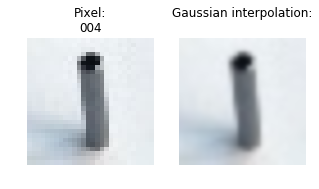

003


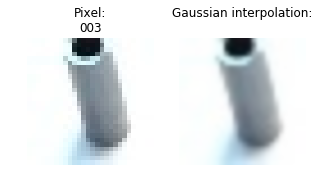

001


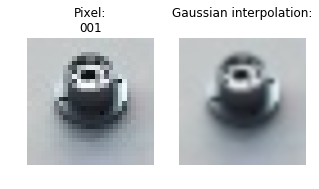

003


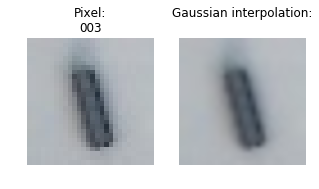

004


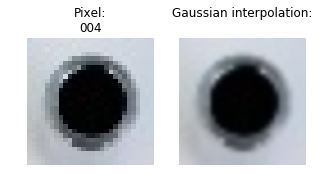

004


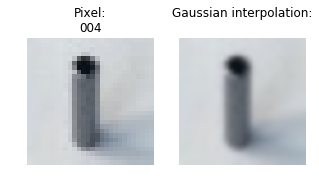

072


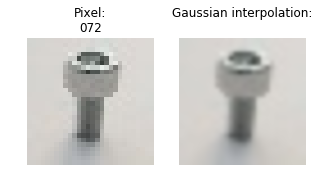

002


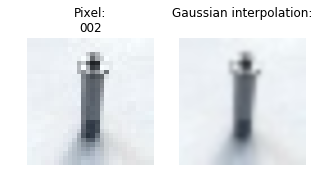

006


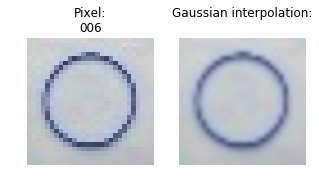

072


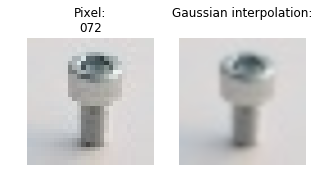

002


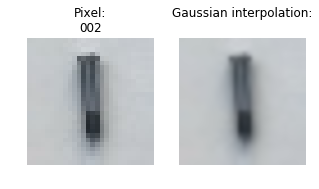

002


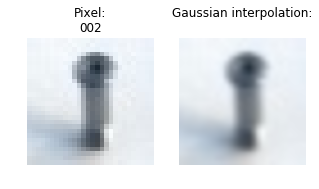

001


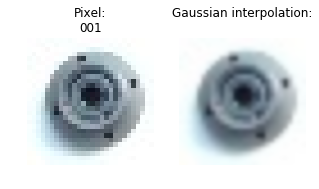

002


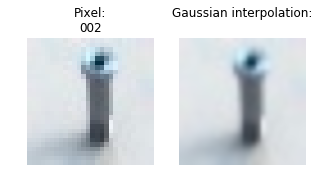

001


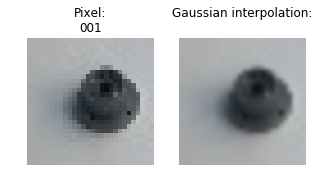

002


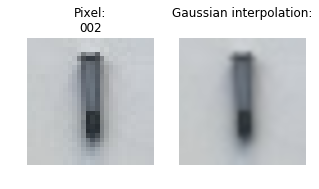

004


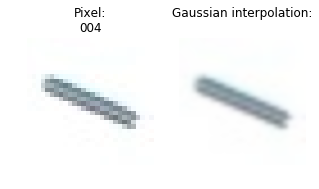

003


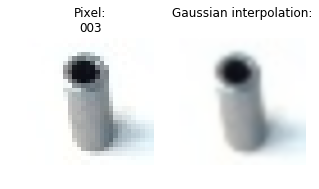

003


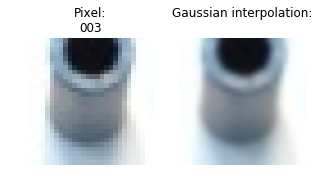

001


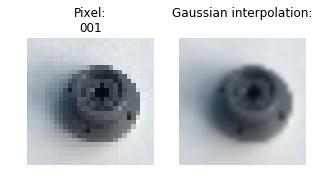

In [81]:
i = 0
while i < 20:
    i =i+1 
    
    X_batch, y_batch = test_images(path=test_path, size=1, GRBtoGray=False, flatten=False)
    label = y_batch
    image_ar = X_batch[0]

    print(label_dict[np.argmax(sess.run(tf.nn.softmax(y_conv, 1), feed_dict={x: X_batch, y_: y_batch, keep_prob: 1}))])




    fig = plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.axis('off')
    ax1.set_title('Pixel:\n' + label_dict[np.argmax(label)])
    ax1.imshow(image_ar, cmap='gray');
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.axis('off')
    ax2.set_title('Gaussian interpolation:\n')
    ax2.imshow(image_ar, cmap='gray', interpolation="gaussian");
    plt.show()

In [82]:
home = os.getcwd().split('AUT-CNN-TUB')[0]
model_path  = os.path.join(home,'AUT-CNN-TUB', 'Data', 'Models', 'model_{}.ckpt'.format(datetime.datetime.now().strftime("%Y-%m-%d_%H-%M")))
saver = tf.train.Saver()
save_path = saver.save(sess, model_path)
print("Model saved in path: %s" % save_path)


Model saved in path: /home/jeronimo/git/AUT-CNN-TUB/Data/Models/model_2018-07-18_11-40.ckpt
